In [12]:
from ipynb.fs.full.functions import import_data
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers, regularizers
import numpy as np
import keras.utils
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler


### Import data

In [21]:
#import training set
X_train, y_train = import_data('databases/Database_2_training.csv')
X_test, y_test = import_data('databases/Database_2_test.csv')
input_size = X_train.shape[1]


## Scale data

In [20]:
#StandardScaler scales the data to 0 mean and 1 standard deviation
scaler=StandardScaler()
print(X_train)
scaling_params = scaler.fit(X_train)




[[ nan 0.03 0.14 ...  nan  nan 0.15]
 [0.05 0.05 0.18 ...  nan  nan 0.05]
 [0.04 0.04 0.2  ...  nan  nan 0.5 ]
 ...
 [ nan  nan 0.15 ...  nan  nan  nan]
 [ nan  nan 0.18 ...  nan  nan 0.64]
 [ nan 0.19  nan ...  nan  nan 1.2 ]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Build model 



In [37]:
model = Sequential()

model.add(Dense(512, activation='relu', input_dim=input_size,kernel_regularizer=regularizers.l2(0.00)))
model.add(Dropout(0.2))
#model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

### Compile model

In [38]:
optimizer = optimizers.Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train model

In [44]:
#X_train is 0.8 of total data set so cross validation needs to be 0.25 of X_train to be 0.2 of total dataset
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=16, verbose = 1)

Train on 549 samples, validate on 183 samples
Epoch 1/100
549/549 [==============================] - 0s 222us/step - loss: 0.5392 - acc: 0.8415 - val_loss: 0.3175 - val_acc: 0.8525
Epoch 2/100
549/549 [==============================] - 0s 179us/step - loss: 0.4554 - acc: 0.8707 - val_loss: 0.3046 - val_acc: 0.8962
Epoch 3/100
549/549 [==============================] - 0s 182us/step - loss: 0.4564 - acc: 0.8689 - val_loss: 0.3214 - val_acc: 0.8306
Epoch 4/100
549/549 [==============================] - 0s 180us/step - loss: 0.4778 - acc: 0.8616 - val_loss: 0.2963 - val_acc: 0.9071
Epoch 5/100
549/549 [==============================] - 0s 182us/step - loss: 0.4576 - acc: 0.8780 - val_loss: 0.2925 - val_acc: 0.8579
Epoch 6/100
549/549 [==============================] - 0s 175us/step - loss: 0.4576 - acc: 0.8689 - val_loss: 0.2934 - val_acc: 0.8634
Epoch 7/100
549/549 [==============================] - 0s 184us/step - loss: 0.4409 - acc: 0.8852 - val_loss: 0.2797 - val_acc: 0.8798
Epoch 8/1

Epoch 61/100
549/549 [==============================] - 0s 188us/step - loss: 0.3673 - acc: 0.9162 - val_loss: 0.1364 - val_acc: 0.9563
Epoch 62/100
549/549 [==============================] - 0s 193us/step - loss: 0.3280 - acc: 0.9344 - val_loss: 0.1285 - val_acc: 0.9617
Epoch 63/100
549/549 [==============================] - 0s 188us/step - loss: 0.3120 - acc: 0.9508 - val_loss: 0.1231 - val_acc: 0.9781
Epoch 64/100
549/549 [==============================] - 0s 188us/step - loss: 0.3379 - acc: 0.9344 - val_loss: 0.1196 - val_acc: 0.9781
Epoch 65/100
549/549 [==============================] - 0s 190us/step - loss: 0.3729 - acc: 0.9217 - val_loss: 0.1285 - val_acc: 0.9727
Epoch 66/100
549/549 [==============================] - 0s 179us/step - loss: 0.3393 - acc: 0.9399 - val_loss: 0.1265 - val_acc: 0.9563
Epoch 67/100
549/549 [==============================] - 0s 186us/step - loss: 0.3493 - acc: 0.9290 - val_loss: 0.1121 - val_acc: 0.9781
Epoch 68/100
549/549 [==========================

### Plot results

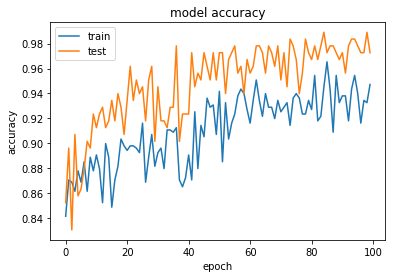

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on test set

In [43]:
loss, accuracy = model.evaluate(x=X_test, y=y_test,batch_size=64, verbose=1)
print('loss on test set = ' + str(loss))
print('accuracy on test set = ' + str(accuracy))

3023/3023 [==============================] - 0s 21us/step
loss on test set = 0.44029994031431025
accuracy on test set = 0.8792590142439975


In [ ]:
model.summary()

In [41]:
results = model.predict(X_test, batch_size=64, verbose=0, steps=None)

In [42]:


results = pd.DataFrame(results, columns=['results']).to_csv('databases/Database_2_results.csv')